In [1]:
from textblob import TextBlob
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

In [ ]:
df = pd.read_json('../Dataset_Clean.json')

In [5]:
# --- Sentiment Calculation ---
df['sentiment'] = df['text'].apply(lambda text: TextBlob(text).sentiment.polarity)

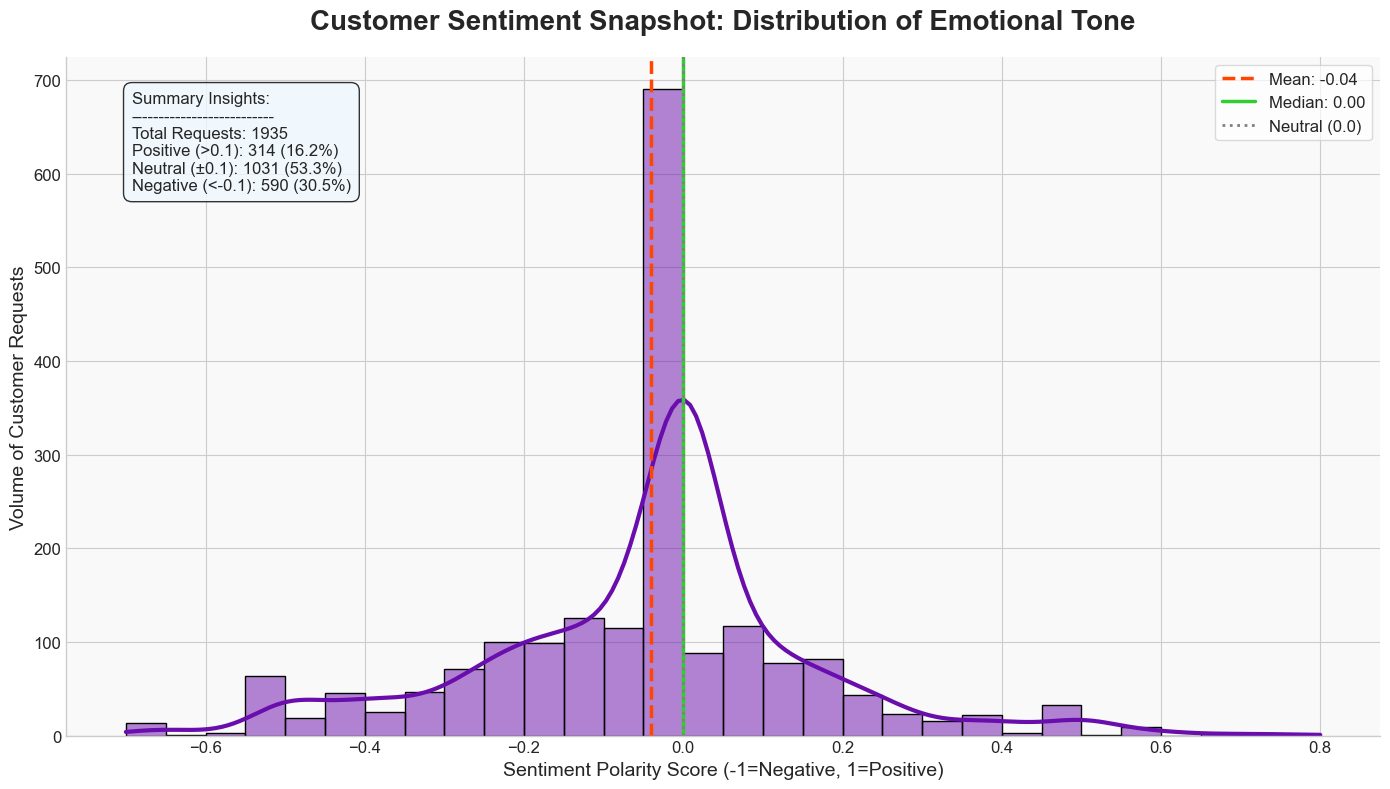

In [6]:
# --- The Professional Visualization ---
plt.style.use('seaborn-v0_8-whitegrid')
fig, ax = plt.subplots(figsize=(14, 8))

# Plot the distribution
sns.histplot(df['sentiment'], bins=30, kde=True, ax=ax,
             color='#6a0dad', line_kws={'linewidth': 3, 'color': '#c364c5'})

# Add key statistics lines
mean_sent = df['sentiment'].mean()
median_sent = df['sentiment'].median()
ax.axvline(mean_sent, color='#ff4500', linestyle='--', linewidth=2.5, label=f'Mean: {mean_sent:.2f}')
ax.axvline(median_sent, color='#32cd32', linestyle='-', linewidth=2.5, label=f'Median: {median_sent:.2f}')

# Add a vertical line for neutral
ax.axvline(0, color='grey', linestyle=':', linewidth=2, label='Neutral (0.0)')

# --- Title and Labels ---
ax.set_title('Customer Sentiment Snapshot: Distribution of Emotional Tone', fontsize=20, pad=20, weight='bold')
ax.set_xlabel('Sentiment Polarity Score (-1=Negative, 1=Positive)', fontsize=14)
ax.set_ylabel('Volume of Customer Requests', fontsize=14)
ax.tick_params(axis='both', which='major', labelsize=12)
ax.legend(fontsize=12, frameon=True, facecolor='white', framealpha=0.7)

# --- Summary Text Box ---
neg_count = df[df['sentiment'] < -0.1].shape[0]
pos_count = df[df['sentiment'] > 0.1].shape[0]
neu_count = df.shape[0] - neg_count - pos_count
total_count = df.shape[0]

summary_text = (
    f"Summary Insights:\n"
    f"--------------------------\n"
    f"Total Requests: {total_count}\n"
    f"Positive (>0.1): {pos_count} ({pos_count/total_count:.1%})\n"
    f"Neutral (±0.1): {neu_count} ({neu_count/total_count:.1%})\n"
    f"Negative (<-0.1): {neg_count} ({neg_count/total_count:.1%})"
)
props = dict(boxstyle='round,pad=0.5', facecolor='aliceblue', alpha=0.8)
ax.text(0.05, 0.95, summary_text, transform=ax.transAxes, fontsize=12,
        verticalalignment='top', bbox=props)

# Final styling
ax.set_facecolor('#f9f9f9')
sns.despine()
plt.tight_layout()
plt.show()